<style>
*
{
	text-align: justify;
	line-height: 1.5;
	font-family: "Arial", sans-serif;
	font-size: 12px;
}

h2, h3, h4, h5, h6
{
	font-family: "Arial", sans-serif;
	font-size: 12px;
	font-weight: bold;
}
h2
{
	font-size: 14px;
}
h1
{
	font-family: "Wingdings", sans-serif;
	font-size: 16px;
}
</style>

## EDA of Water Levels

<!--
import data_analytics.github as github
print(github.create_jupyter_notebook_header("markcrowe-com", "data-analytics-project-template",
                                            "notebooks/notebook-1-04-eda-water-levels.ipynb"))
-->
<table style="margin: auto;"><tr><td><a href="https://mybinder.org/v2/gh/markcrowe-com/data-analytics-project-template/master?filepath=notebooks/notebook-1-04-eda-water-levels.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></td><td>online editors</td><td><a href="https://colab.research.google.com/github/markcrowe-com/data-analytics-project-template/blob/master/notebooks/notebook-1-04-eda-water-levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></td></tr></table>

### Objective
The objective is to provide an Exploratory Data Analysis (EDA) of the water levels data files. The EDA is performed to investigate and clean the data, to spot anomalies.  Data sourced from [EPA: Water Quality and Monitoring, Groundwater Quality (Excel) 1990 - 2020](https://gis.epa.ie/GetData/Download)
### Setup
Import required third party Python libraries, import supporting functions and sets up data source file paths.

In [1]:
# Local
#!pip install -r script/requirements.txt --quiet
# Remote option
#!pip install -r https://github.com/tahirawwad/agriculture-data-analytics/blob/master/notebooks/script/requirements.txt --quiet

In [42]:
from population_planning.dataframe_labels import *
from population_planning.project_manager import ProjectArtifactManager, ProjectAssetManager
import data_analytics.github as github
import data_analytics.exploratory_data_analysis_reports as eda_reports
import numpy
import os
import pandas
import matplotlib.pyplot as pyplot

In [3]:
artifact_manager = ProjectArtifactManager()
asset_manager = ProjectAssetManager()
artifact_manager.is_remote = asset_manager.is_remote = True
github.display_jupyter_notebook_data_sources([asset_manager.get_population_estimates_filepath()])
artifact_manager.is_remote = asset_manager.is_remote = False

https://github.com/markcrowe-com/population-planning-data-analytics/blob/master/assets/2021-12Dec-11-population-estimates-1950-2021-pea01.csv?raw=true


### Working with population estimates CSV file
#### Create Data Frames

In [3]:
filepath = "./../assets/epa-groundwater-monitoring-data-to-end-2020-circulation-26.05.21.xlsx"

excelWorkbook = pandas.ExcelFile(filepath)
worksheet_name = 'Data'
ground_water_dataframe = excelWorkbook.parse(worksheet_name);

In [ ]:
import re as RegularExpression
def camel_to_snakecase(name: str) -> str:
    """
    Convert CamelCase to snake_case
    :param name: string
    :return: snake_case string
    """
    name = RegularExpression.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return RegularExpression.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

def english_to_snakecase(name: str) -> str:
    """
    Convert CamelCase to snake_case
    :param name: string
    :return: snake_case string
    """
    return name.lower().replace(" ", "-")

english_to_snakecase("EPA Groundwater Monitoring Data to End 2020 Circulation 26.05.21")

#### Renaming Columns

In [ ]:
# rename the columns
old_to_new_column_names_dictionary = {
                                      "Age Group" : AGE,
                                      "VALUE" : POPULATION
                                     }
#ground_water_dataframe = ground_water_dataframe.rename(columns = old_to_new_column_names_dictionary)
#ground_water_dataframe.head(0)

### Data Type Analysis Quick View
Print an analysis report of each dataset.  
- Show the top five rows of the data frame as a quick sample.
- Show the data types of each column.
- Report the count of any duplicate rows.
- Report the counts of any missing values.

In [64]:
# A function to vizualize missing data in a DataFrame
from pandas import DataFrame
import matplotlib.pyplot as pyplot
import seaborn 

def calculate_missing_value_stats(dataframe: DataFrame):
    missing_value_stats_dataframe = DataFrame(
        {
            'Missing'   : dataframe.isnull().sum(),
            '% Missing' : dataframe.isnull().sum() / len(dataframe)
        })
    missing_value_stats_dataframe = missing_value_stats_dataframe[missing_value_stats_dataframe['% Missing'] > 0].sort_values(by='Missing', ascending=False)
    return missing_value_stats_dataframe

def viz_missing(missing_value_stats_dataframe: DataFrame) :
    pyplot.subplots(figsize=(40, 30))
    seaborn.barplot(x=missing_value_stats_dataframe.index, y='% Missing', data=missing_value_stats_dataframe)
    pyplot.xticks(rotation=90)
    pyplot.show()

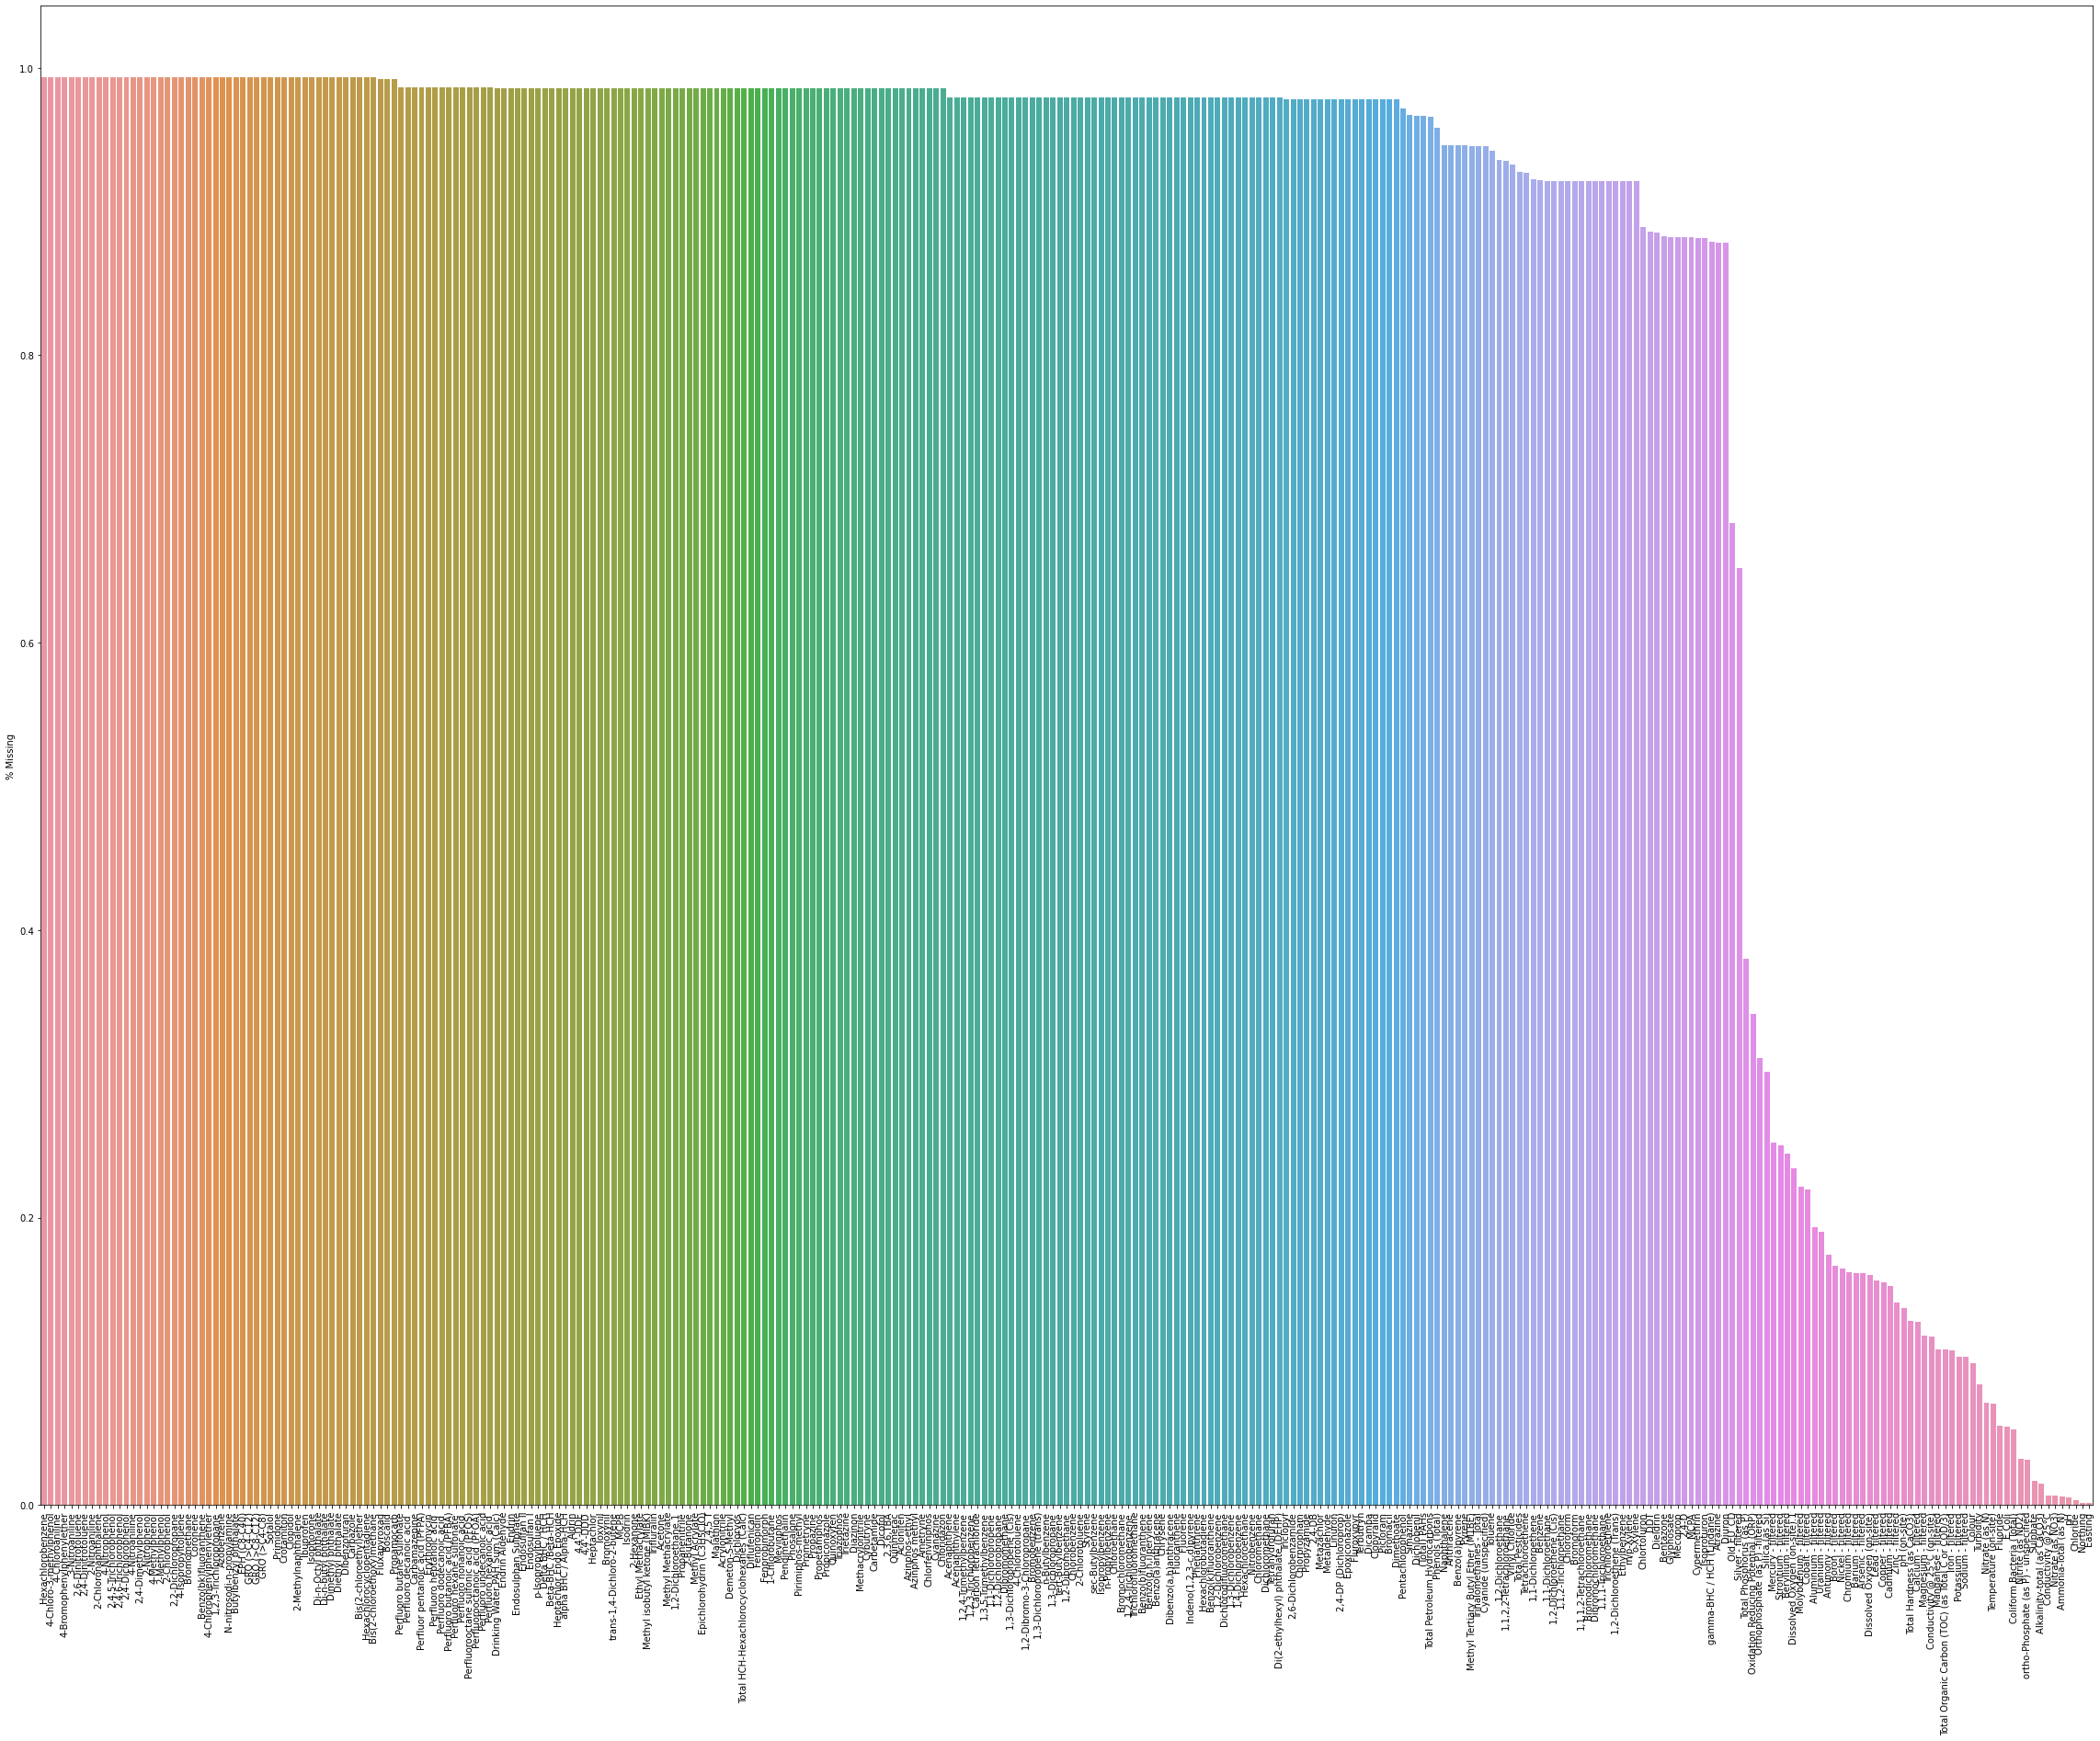

In [65]:
viz_missing(missing_value_stats_dataframe)

In [53]:
missing_value_stats_dataframe = calculate_missing_value_stats(ground_water_dataframe)

missing_value_stats_dataframe

,Missing,% Missing
Hexachlorobenzene,14594,0.993465
4-Chloro-3-methylphenol,14594,0.993465
4-Chloroaniline,14594,0.993465
4-Bromophenylphenylether,14594,0.993465
3-Nitroaniline,14594,0.993465
...,...,...
Ammonia-Total (as N),83,0.005650
pH,80,0.005446
Chloride,49,0.003336
Northing,18,0.001225


In [45]:
dataframe_columns = ground_water_dataframe.columns.values.tolist()

print("Columns:", len(dataframe_columns))

for column in dataframe_columns[3:-1]:
    try:
        ground_water_dataframe[column] = ground_water_dataframe[column].astype('int32')
    except:
        print(ground_water_dataframe[column].unique())

Columns: 304
[215540.  90948.  98706.  73677. 102721. 327250. 327570. 263272. 255458.
 131016. 258239. 242124. 155391. 171090. 126474. 121780. 150133. 142378.
 159746. 171700. 112340. 127780. 244819. 113873. 276033. 277876. 281688.
 253943. 245100. 239996. 275487. 277108. 238559. 128080. 335584. 259500.
 253900. 274313. 104400. 340440. 335912. 313702. 278323. 269800. 319820.
 146508. 126492. 121655. 136291. 141209. 179000. 144515. 260374. 200730.
  66200. 211587. 252256. 284812. 257280. 206193. 206300. 130510. 114603.
 136820. 214500. 144556. 262731. 229503. 208800. 150645. 135500. 226609.
 205662. 231663. 146730. 146927. 261878. 114000.  93390. 240445. 258273.
 259773. 252951. 252373. 121637. 219400.  97691.  99325. 162773. 158326.
 170325. 298727. 299500. 307115. 228000. 207672. 203350. 297500. 149600.
 295184. 159150. 161200. 110952. 200841. 318047. 212336. 205809. 104521.
  92840. 197078. 291900. 101027. 302873. 311872.  94709. 200046. 208593.
 245620. 332883. 241369. 363853. 22365

 0.23 0.0035]
['<1.5' 3.5 11.5 ... 46 69 66]
[6.05 6.35 8.23 ... 0.94 0.63 0.58]
[13 15 14 ... 95.3 9.51 8.36]
[0.16 '<0.150' 0.15 0.17 0.18 0.295 0.75 0.24 '<0.1' 0.22 0.21 0.19 0.26
 0.37 0.2 0.225 2.02 0.32 0.59 0.3 0.34 0.23 0.255 0.63 0.69 0.28 0.31
 0.46 0.72 0.29 0.41 1.5 0.6 0.85 0.1 0.27 0.39 0.36 0.35 0.7 0.45 1.54
 0.83 0.76 0.175 0.4 0.81 0.48 1.46 1.07 0.78 1 1.25 1.59 0.25 1.96 0.325
 0.77 0.33 0.52 1.14 1.655 0.44 0.185 0.305 0.53 1.39 0.92 0.8 0.84 1.77
 0.885 0.56 2.155 0.68 0.42 0.585 0.91 0.38 '<0.20' 0.235 0.165 nan 0.58
 0.99 1.58 1.7 2.05 0.79 0.96 1.42 0.355 0.98 1.01 0.9 0.275 0.73 0.88
 1.28 0.55 1.62 0.64 1.47 0.86 1.88 0.155 '<1' 4.39 4.67 1.97 0.65 1.49
 0.43 0.51 1.48 0.835 0.74 1.65 0.5 1.04 1.38 0.62 2.16 6.97 1.06 0.87
 2.09 0.93 1.44 0.57 1.9 2.9 0.71 1.3 0.97 2.8 1.2 '<0.2' 0.66 0.14 0.12
 0.11 1.69 '<0.01' 1.4 0.47 0.326 1.02 0.126 0.1346 0.1789 0.119 0.1636
 '<0.1<' 0.288 0.13 0.146 2.06 0.4944 0.2699 0.1028 0.1262 0.67 0.139
 0.157 0.1096 0.127 0.54

[nan '<0.5' '<1' '<2' '<0.1' 0.2 0.1 0.146 0.129 '<0.02' 0.022 0.069 0.036
 0.073 0.032 0.058]
[nan '<0.5' '<1' '<2' '<0.1' 0.2 0.1]
[nan '<10' 60 17 22 21 26 67 25 28 42 76 300 630 47 20 46 12.5 10.8 24]
[nan '<1' '<1.0' 18 12 140 7.3 9.1 8.2 1 12.3 17.7 147.1 11.4 2 6.4 10.8
 19.1 '<2' 10.7 17.2 2.1 17 '<0.5' 0.6 2.2 3.4 0.7 0.9 0.8 1.6 0.5 1.3
 13.2 '<0.1' 4 5 4.4 3.9 8 6.6 3.8 0.1 0.2 121 1.5 1.2 220 35.8 0.162
 0.429 3 1.14 0.497 0.763 1.226 0.592 2.037 13]
[nan '<1' '<1.0' 1.1 2.7 '<2' '<0.5' 4.7 0.9 8.2 3.5 2.4 3.7 1.8 3.3 2.2
 4.6 2.8 5.4 2.6 5.5 3.4 1 4.3 0.6 7.5 6.1 0.8 '<0.1' 1.3 3.1 4.5 6.8
 3.873 'nr' 2.1 10.6 4 0.7 1.7 6.9 3.2 10.3 2.3 2 21.5 0.3 0.4 0.1 1.9 1.6
 0.5 1.5 3.186 0.804 4.324 3.726 0.968 2.019 7 0.242 'N.F.' 0.185 0.03
 3.061 6 24 9]
[nan '<2' '<2.0' '<1' 5.2 22.8 18.9 26.7 '<0.5' 1.1 8 6.1 2.8 0.8 4.2 6.7
 1.2 18.7 '<0.1' 3.1 0.102 8.4 0.748 1.8 7.1 3.4 2.9 5.4 0.6 12 1.3 0.2
 0.3 0.9 0.1 23.3 25 14.4 0.153 0.823 0.149 0.436 7 0.15 0.083 'N.F.'
 0.061 0.043 

In [14]:
filename = os.path.basename(filepath)

ground_water_dataframe[["Easting", "Northing"]] = ground_water_dataframe[["Easting", "Northing"]].apply(pandas.to_numeric)

In [ ]:
ground_water_dataframe.replace("-", numpy.nan, inplace = True)

In [16]:
ground_water_dataframe.replace("--", numpy.nan, inplace = True)

In [22]:
ground_water_dataframe[["Temperature (on-site)"]]= ground_water_dataframe[["Temperature (on-site)"]].apply(pandas.to_numeric)

In [23]:
eda_reports.print_dataframe_analysis_report(ground_water_dataframe, filename)

Row, Column Count: (14690, 304)


,County,Site Name,Easting,Northing,New Code,Old MP Code,Old EU_CD,Sample Date,pH (on-site),Temperature (on-site),...,Clopidol,Crotamiton,Ibuprofen,Primidone,Sotalol,GRO (>C4-C8),GRO (>C8-C12),GRO (>C4-C12),EPH (C8-C40),Hexachlorobenzene
0,Kildare,Pollardstown Fen - MB7 (Upper),276810.0,215540.0,IE_SE_G_0106_1400_0014,09_014,NaN,2010-06-10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kildare,Pollardstown Fen - MB7 (Middle),276810.0,215540.0,IE_SE_G_0106_1400_0015,09_015,NaN,2010-06-10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cork,Millstreet PWS (Finnow Spring),126029.0,90948.0,IE_SW_G_0070_0500_0021,04_021,NaN,2010-06-14,7.6,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cork,Banteer PWS (Poulgorm Spring),140013.0,98706.0,IE_SW_G_0018_0500_0004,04_004,NaN,2010-06-14,7.2,10.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cork,Coachford Pws (Fr Sheehan Place),145598.0,73677.0,04_010,04_010,NaN,2010-06-14,6.7,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


County                object
Site Name             object
Easting              float64
Northing             float64
New Code              object
                      ...   
GRO (>C4-C8)          object
GRO (>C8-C12)         object
GRO (>C4-C12)         object
EPH (C8-C40)          object
Hexachlorobenzene     object
Length: 304, dtype: object

Number of duplicate rows:  0


County                   0
Site Name                0
Easting                 18
Northing                18
New Code                 0
                     ...  
GRO (>C4-C8)         14594
GRO (>C8-C12)        14594
GRO (>C4-C12)        14594
EPH (C8-C40)         14594
Hexachlorobenzene    14594
Length: 304, dtype: int64


No single value columns found.


- The column "Northing" has 128 outliers. Recommend removing outliers.
- The column "Temperature (on-site)" has 1025 outliers. Recommend removing outliers.


### Save Artifact
Saving the output of the notebook.

In [ ]:
#population_dataframe.to_csv("./../artifacts/water-levels-cleaned.csv", index=None)

Author &copy; 2021 <a href="https://github.com/markcrowe-com" target="_parent">Mark Crowe</a>. All rights reserved.